#### WEEK 1 DATE: 17 MARCH 2022
## Exercise 1

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 6. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [2]:
def myFnLinReg(x,y):
    
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    b1_num = np.sum(np.multiply((x - x_mean),(y-y_mean)))
    b1_den = np.sum(np.multiply((x-x_mean),(x-x_mean)))
    b1 = b1_num/b1_den
    
    b0 = y_mean - (b1 * x_mean)
    
    return b0,b1

The regression line will be y = b0 + b1*x

### 7. Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (70 %,30%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [3]:
#Importing the mtcars dataset
df = pd.read_csv("mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df = df[['wt','mpg']]
df.shape

(32, 2)

In [5]:
# Assigning the attribute 'wt' to x and 'mpg' to y
x = df['wt']
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
b0,b1 = myFnLinReg(X_train, y_train)

print("Regression line: y = {} + {}*x".format(b0,b1))


Regression line: y = 40.63710645591722 + -6.321221582690658*x


### 8. What is the mpg of a car, whose weight is 6.7?

In [6]:
# Creating a user defined function to predict the mpg of new input('wt').

def LR_model(wt):
    mpg = b0 + b1*wt
    return mpg

LR_model(6.7)

-1.7150781481101873

### 9. Compute and print accuracy measures such as RMSE and R2 for the test set.

In [7]:
# Writing user defined functions to calculate RMSE and R-square values

def RMSE(y_pred, y_test):
    return np.sqrt(((y_pred - y_test) ** 2).mean())
y_pred = LR_model(X_test)

RMSE(y_pred,y_test)

3.700531874067273

The RMSE value obtained is 3.014

In [8]:
def R_square(y_test, y_pred):
    size = np.size(y_test)
    sum_x = np.sum(y_test)
    sum_y = np.sum(y_pred)
    sum_x2 = np.sum(np.square(y_test))
    sum_y2 = np.sum(np.square(y_pred))
    sum_xy = np.sum(np.multiply(y_test,y_pred))

    r2 = ((size*sum_xy)-(sum_x*sum_y))/pow((((size*sum_x2)-(sum_x*sum_x))*((size*sum_y2)-(sum_y*sum_y))),0.5)
    return r2
R_square(y_test, y_pred)

0.8689276480625467

The R-square value obtained is 0.869 indicating that our model is almost 87% accurate

### Using sklearn library:

In [9]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

3.700531874067273

In [10]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6962481672396879

#### 10.Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

In [11]:
# Preprocessing / Scaling: Since our columns are on different scale it is important to perform scaling on them

from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('mpg',axis='columns'))
scaled_y = sy.fit_transform(df['mpg'].values.reshape(df.shape[0],1))
scaled_X

array([[0.28304781],
       [0.34824853],
       [0.20634109],
       [0.43518282],
       [0.49271286],
       [0.49782664],
       [0.52595244],
       [0.42879059],
       [0.41856303],
       [0.49271286],
       [0.49271286],
       [0.65379698],
       [0.56686269],
       [0.57964715],
       [0.9555101 ],
       [1.        ],
       [0.97980056],
       [0.1756584 ],
       [0.02608029],
       [0.08233188],
       [0.24341601],
       [0.51316799],
       [0.49143442],
       [0.59498849],
       [0.59626694],
       [0.10790079],
       [0.16031705],
       [0.        ],
       [0.42367681],
       [0.32140118],
       [0.52595244],
       [0.32395807]])

In [12]:
scaled_y

array([[0.45106383],
       [0.45106383],
       [0.52765957],
       [0.46808511],
       [0.35319149],
       [0.32765957],
       [0.16595745],
       [0.59574468],
       [0.52765957],
       [0.37446809],
       [0.31489362],
       [0.25531915],
       [0.29361702],
       [0.20425532],
       [0.        ],
       [0.        ],
       [0.18297872],
       [0.93617021],
       [0.85106383],
       [1.        ],
       [0.47234043],
       [0.21702128],
       [0.20425532],
       [0.12340426],
       [0.37446809],
       [0.71914894],
       [0.66382979],
       [0.85106383],
       [0.22978723],
       [0.39574468],
       [0.19574468],
       [0.46808511]])

In [13]:
scaled_y.reshape(32,)

array([0.45106383, 0.45106383, 0.52765957, 0.46808511, 0.35319149,
       0.32765957, 0.16595745, 0.59574468, 0.52765957, 0.37446809,
       0.31489362, 0.25531915, 0.29361702, 0.20425532, 0.        ,
       0.        , 0.18297872, 0.93617021, 0.85106383, 1.        ,
       0.47234043, 0.21702128, 0.20425532, 0.12340426, 0.37446809,
       0.71914894, 0.66382979, 0.85106383, 0.22978723, 0.39574468,
       0.19574468, 0.46808511])

In [14]:
# we will use random library to pick training sample
import random
random.randint(0,6)

5

### Implementing stochastic gradient descent algorithm

In [15]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
     # numpy array with 1 row and column equal to number of features. In
    # our case number_of_features = 1 (weight)
    
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples) * (sample_y - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y - y_predicted)
        
        if i%100 == 0: # at every iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd   

(array([0.47086607]), 0.16531947597273583, 0.005202134905675716)

In [16]:
def predict(weight,w,b):
    scaled_X = sx.transform([[weight]])[0]
    # here w1 = w[0] and bias is b
    # equation for price is w1*wt + bias

    scaled_price = w[0] * scaled_X[0]+ b
    # once we get mpg prediction we need to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0] 

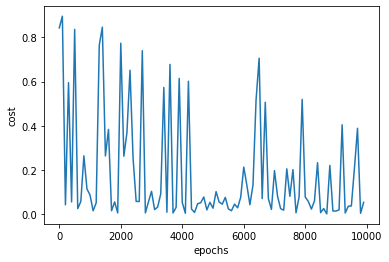

In [17]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [18]:
predict(6.7,w_sgd,b_sgd)

28.960534193311894

### Implementing mini-batch gradient descent algorithm

In [19]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list_mini = []
    epoch_list_mini = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_temp = X[random_indices]
        y_temp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_temp[j:j+batch_size]
            yj = y_temp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost_mini = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list_mini.append(cost_mini)
            epoch_list_mini.append(i)
        
    return w, b, cost_mini, cost_list_mini, epoch_list_mini

w_mini, b_mini, cost_mini, cost_list_mini, epoch_list_mini = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 1000,
    batch_size = 5
)
w_mini, b_mini, cost_mini

(array([-0.88955218]), 0.7985336502194109, 0.004721498268121223)

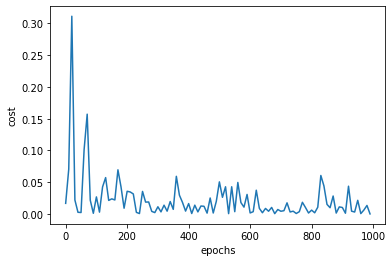

In [20]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_mini,cost_list_mini)

In [21]:
predict(6.7,w_mini, b_mini)

1.4407853807988935

## Exercise 2

### 4. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’.

In [22]:
# Importing the boston.csv dataset
df1 = pd.read_csv("boston.csv")
df1.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot:>

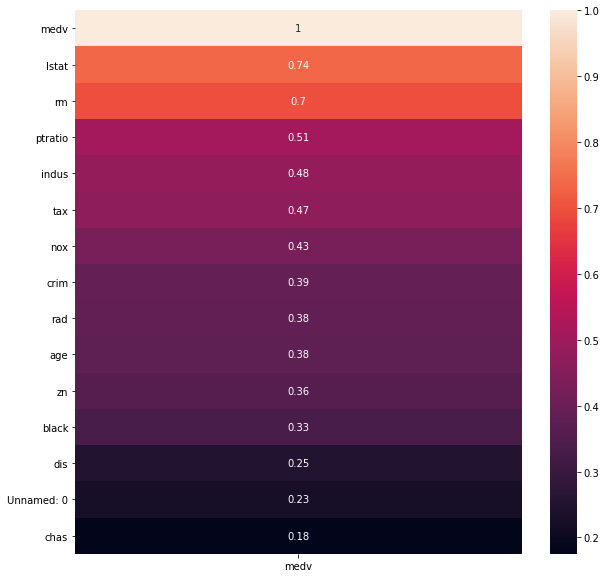

In [23]:
# Finding the correlation values to find the best features to predict 'medv'
corr = pd.DataFrame(df1.corr()['medv'].abs().sort_values(ascending=False))
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In the above heatmap, we can find the correletion values between different attributes, and the 5 best features to predict 'MEDV' can be 
#### rm, Istat, indus, ptratiio and tax

### 5.Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 4features.  (from sklearn.linear_model import LinearRegression) 

In [24]:
# Inserting the required best 4 features into a new dataframe 'best4fea' and the response variable 'medv' into 'target'
best4fea = df1[['rm','lstat','indus','ptratio']]
target = df1[['medv']]

# Creating a linear regression model using the linear_regression module from the sklearn library
reg = LinearRegression()
reg.fit(best4fea, target)
reg.coef_

array([[ 4.51517866, -0.57571066,  0.00756681, -0.93512212]])

In [25]:
reg.intercept_

array([18.61497042])

In [26]:
# Using the 'score' method to find the accuracy of our model
reg.score(best4fea,target)*100

67.86434855761495

#### 'reg' is our multiple regression model for the boston.csv dataset with the best 4 features

### 6.Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [27]:
# Using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(best4fea, target, test_size=0.2)

# Once again training our model on training dataset
reg.fit(X_train,y_train)

# Using the 'score' method to find the accuracy of our model
reg.score(X_test,y_test)*100

78.07122183103556

From the above value, we can say that our model is around 80% accurate